In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('model_features_final4_classic_historical.csv')
print(df.shape)
df.head()

(45, 27)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,ovr_rating_bpi,ovr_rating_torvik,...,2p%_off,3p%_off,ft%_off,eff_def,ft%_def,height_eff,size,bench,s_b,c_s
0,2008,Final Four,Final Four,1,2008 North Carolina,1,2008 Kansas,0,-1.7,-0.024389,...,10.3,3.8,7.7,-22.7779,-4.3,-1.53,0.32,1.00,0,0
1,2008,Final Four,Final Four,1,2008 Memphis,1,2008 UCLA,1,0.4,0.003261,...,6.5,0.8,-8.5,-27.8785,-6.3,-0.06,0.31,9.77,0,0
2,2008,Final Four,Championship,1,2008 Kansas,1,2008 Memphis,1,2.6,0.011902,...,13.2,10.1,3.5,-23.4579,8.1,0.17,-0.88,-2.06,0,0
3,2009,Final Four,Final Four,2,2009 Michigan St.,1,2009 Connecticut,1,-4.6,-0.032308,...,8.6,4.0,-2.3,-16.8296,2.0,-3.48,-1.57,10.86,0,0
4,2009,Final Four,Championship,2,2009 Michigan St.,1,2009 North Carolina,0,-7.5,-0.029345,...,4.4,0.3,-0.8,-22.8376,-6.9,0.40,-0.54,8.98,0,0


In [143]:
df2 = df.drop(columns=['year', 
                       'region', 
                       'round', 
                       'high_bracket_seed', 
                       'high_bracket_team', 
                       'low_bracket_seed', 
                       'low_bracket_team'
                      ])
print(df2.shape)
df2.head()

(45, 20)


,win,ovr_rating_bpi,ovr_rating_torvik,off_rating_torvik,def_rating_bpi,def_rating_kenpom,efg%_off,to%_off,ftr_def,to%_def,2p%_off,3p%_off,ft%_off,eff_def,ft%_def,height_eff,size,bench,s_b,c_s
0,0,-1.7,-0.024389,3.432635,-11.4,-13.373373,7.6,-3.9,-12.0,2.5,10.3,3.8,7.7,-22.7779,-4.3,-1.53,0.32,1.00,0,0
1,1,0.4,0.003261,-1.855125,0.1,-1.524928,5.0,-5.5,-5.3,4.5,6.5,0.8,-8.5,-27.8785,-6.3,-0.06,0.31,9.77,0,0
2,1,2.6,0.011902,1.623885,-1.7,-0.367605,13.8,-4.6,-7.8,5.7,13.2,10.1,3.5,-23.4579,8.1,0.17,-0.88,-2.06,0,0
3,1,-4.6,-0.032308,-2.716880,-6.2,-3.423385,7.6,3.8,-9.7,2.6,8.6,4.0,-2.3,-16.8296,2.0,-3.48,-1.57,10.86,0,0
4,0,-7.5,-0.029345,4.636934,-14.2,-11.471385,2.9,0.4,-3.9,3.7,4.4,0.3,-0.8,-22.8376,-6.9,0.40,-0.54,8.98,0,0


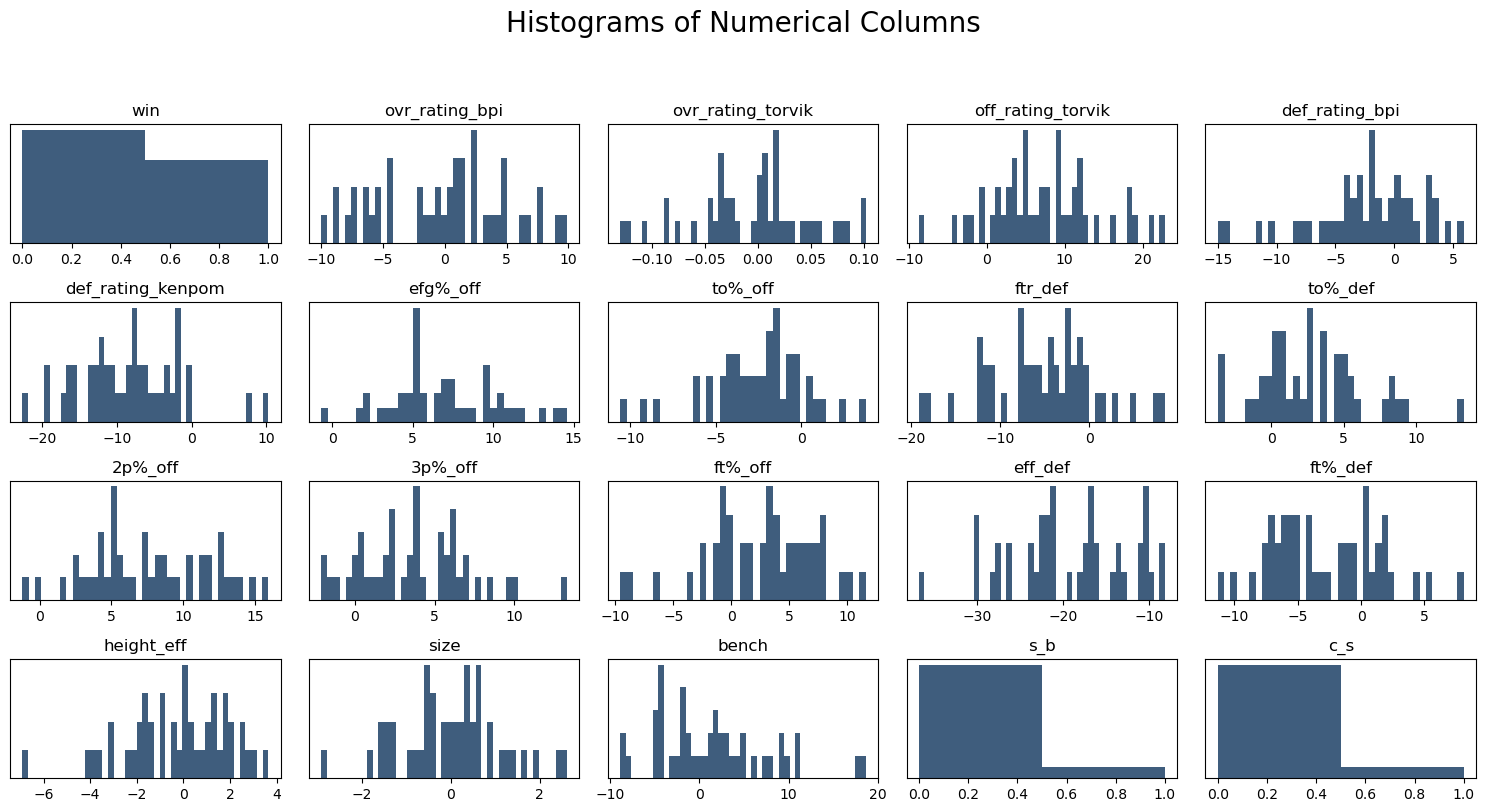

In [144]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

<Axes: title={'center': 'Correlation with the Response Variable'}>

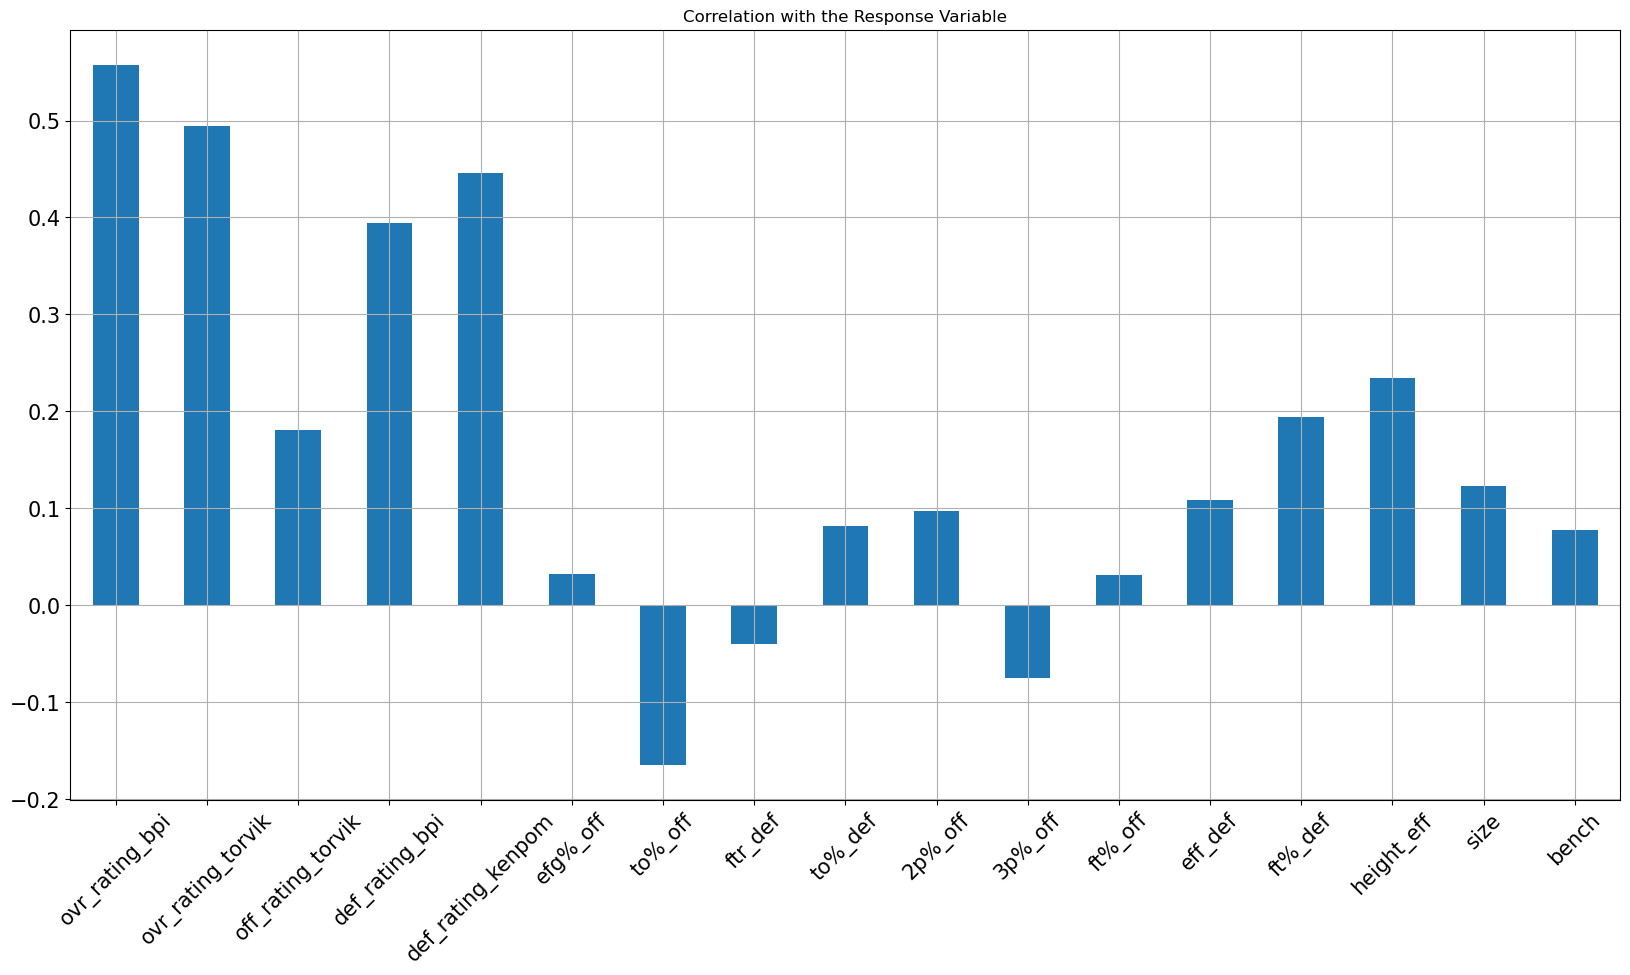

In [145]:
df2.drop(columns=['win', 's_b', 'c_s']).corrwith(df2.win).plot.bar(
    figsize=(20,10), title='Correlation with the Response Variable', fontsize=15,
    rot=45, grid=True
)

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='win'),
                                                    df2['win'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36, 19)
(36,)
(9, 19)
(9,)


In [147]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

# I. Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [149]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.8611111111111112
Accuracy Test:  0.5555555555555556
Precision Train:  0.8666666666666667
Precision Test:  0.3333333333333333
Recall Train:  0.8125
Recall Test:  0.3333333333333333
F1 Train:  0.8387096774193549
F1 Test:  0.3333333333333333
ROC_AUC Train:  0.8562500000000001
ROC_AUC Test:  0.5


### BAD! OVERFIT

# II. RFE Logistic Regression

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(clf, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=10)

In [152]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [153]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.8333333333333334
Accuracy Test:  0.7777777777777778
Precision Train:  0.8571428571428571
Precision Test:  0.6666666666666666
Recall Train:  0.75
Recall Test:  0.6666666666666666
F1 Train:  0.7999999999999999
F1 Test:  0.6666666666666666
ROC_AUC Train:  0.825
ROC_AUC Test:  0.75


In [154]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['features']),
           pd.DataFrame(np.transpose(clf.coef_), columns=['coef'])],
           axis=1)

,features,coef
0,ovr_rating_bpi,0.583248
1,def_rating_kenpom,-0.133904
2,to%_def,0.101030
3,ft%_off,0.156938
4,eff_def,0.490326
5,ft%_def,-0.213943
6,height_eff,-0.262740
7,bench,0.246308
8,s_b,0.679860
9,c_s,0.189852


### BETTER. Try Lasso

# III. Lasso Regression

In [155]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [156]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 19
selected features: 5
features with coefficients shrank to zero: 14


In [157]:
selected_feat

Index(['ovr_rating_bpi', 'def_rating_kenpom', 'to%_def', 'ft%_def', 's_b'], dtype='object')

In [158]:
X_train2 = X_train[['ovr_rating_bpi', 'def_rating_kenpom', 'to%_def', 'ft%_def', 's_b']]
X_test2 = X_test[['ovr_rating_bpi', 'def_rating_kenpom', 'to%_def', 'ft%_def', 's_b']]


clf = LogisticRegression(random_state=0)
clf.fit(X_train2, y_train)

LogisticRegression(random_state=0)

In [159]:
y_pred_train = clf.predict(X_train2)
y_pred_test = clf.predict(X_test2)

In [160]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.8333333333333334
Accuracy Test:  0.5555555555555556
Precision Train:  0.9166666666666666
Precision Test:  0.3333333333333333
Recall Train:  0.6875
Recall Test:  0.3333333333333333
F1 Train:  0.7857142857142857
F1 Test:  0.3333333333333333
ROC_AUC Train:  0.81875
ROC_AUC Test:  0.5


### RFE is better

# IV. SVM

In [161]:
from sklearn.svm import SVC

clf = SVC(random_state=0, kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [162]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [163]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.8888888888888888
Accuracy Test:  0.2222222222222222
Precision Train:  0.875
Precision Test:  0.16666666666666666
Recall Train:  0.875
Recall Test:  0.3333333333333333
F1 Train:  0.875
F1 Test:  0.2222222222222222
ROC_AUC Train:  0.8875
ROC_AUC Test:  0.24999999999999997


### No

# V. Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [165]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [166]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  1.0
Accuracy Test:  0.7777777777777778
Precision Train:  1.0
Precision Test:  1.0
Recall Train:  1.0
Recall Test:  0.3333333333333333
F1 Train:  1.0
F1 Test:  0.5
ROC_AUC Train:  1.0
ROC_AUC Test:  0.6666666666666666


### Compare RF and RFE Regression onto actual games

# VI. Full DF

In [167]:
comp_df = df[['year', 
              'region', 
              'round', 
              'high_bracket_seed', 
              'high_bracket_team',
              'low_bracket_seed', 
              'low_bracket_team', 
              'win']]
              
df = df.drop(columns=['year', 
                      'region', 
                      'round', 
                      'high_bracket_seed', 
                      'high_bracket_team',
                      'low_bracket_seed', 
                      'low_bracket_team', 
                      'win'
                     ])
log_pred = rfe.predict(df)
comp_df['log_pred'] = log_pred
comp_df['log_comp'] = comp_df['win'] - comp_df['log_pred']
rf_pred = clf.predict(df)
comp_df['rf_pred'] = rf_pred
comp_df['rf_comp'] = comp_df['win'] - comp_df['rf_pred']

In [168]:
comp_df

,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,log_pred,log_comp,rf_pred,rf_comp
0,2008,Final Four,Final Four,1,2008 North Carolina,1,2008 Kansas,0,0,0,0,0
1,2008,Final Four,Final Four,1,2008 Memphis,1,2008 UCLA,1,0,1,0,1
2,2008,Final Four,Championship,1,2008 Kansas,1,2008 Memphis,1,1,0,1,0
3,2009,Final Four,Final Four,2,2009 Michigan St.,1,2009 Connecticut,1,0,1,0,1
4,2009,Final Four,Championship,2,2009 Michigan St.,1,2009 North Carolina,0,0,0,0,0
5,2009,Final Four,Final Four,3,2009 Villanova,1,2009 North Carolina,0,0,0,0,0
6,2010,Final Four,Final Four,5,2010 Michigan St.,5,2010 Butler,0,0,0,0,0
7,2010,Final Four,Final Four,2,2010 West Virginia,1,2010 Duke,0,0,0,0,0
8,2010,Final Four,Championship,5,2010 Butler,1,2010 Duke,0,0,0,0,0
9,2011,Final Four,Final Four,4,2011 Kentucky,3,2011 Connecticut,0,0,0,1,-1
